In [1]:
import numpy as np
# from sklearn import datasets
import pandas as pd
from sklearn import preprocessing as pp

In [2]:
data= np.loadtxt("training_boston_x_y_train.csv",delimiter = ",")
x = data[:,0:-1]
x_train = pp.scale(x)
df = pd.DataFrame(x_train)
y = data[:,-1]
df['ones']=1
x_train = df.to_numpy()
df = pd.DataFrame(x_train)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.400981,-0.490427,-1.281492,-0.287849,-0.605917,1.207950,0.814838,-0.505604,-0.784522,-1.297963,-0.322642,0.420280,-1.100955,1.0
1,-0.400534,-0.490427,0.207535,-0.287849,-1.047205,-0.030261,-0.891071,0.328940,-0.557982,-0.102675,0.093911,0.302580,-0.531433,1.0
2,0.099008,-0.490427,0.964253,-0.287849,1.340946,-0.471970,0.659427,-0.561179,1.594148,1.459945,0.788166,-3.726145,0.860578,1.0
3,0.008138,-0.490427,0.964253,-0.287849,1.834151,-0.080131,0.775082,-0.693215,1.594148,1.459945,0.788166,-0.049549,0.194293,1.0
4,-0.405257,-0.490427,-0.990005,-0.287849,-0.943373,-0.416400,-0.887456,0.294021,-0.784522,-0.983107,0.001343,0.440491,0.010442,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,-0.210638,-0.490427,1.176766,3.474042,0.406452,2.129840,1.031691,-0.811218,-0.557982,-0.073522,-1.757436,0.371535,-1.501831,1.0
375,0.198643,-0.490427,0.964253,-0.287849,1.340946,0.183470,0.659427,-0.683814,1.594148,1.459945,0.788166,-2.756549,0.474907,1.0
376,-0.401413,-0.490427,0.207535,-0.287849,-1.047205,-0.238291,-0.862157,0.138088,-0.557982,-0.102675,0.093911,0.342894,-0.347582,1.0
377,-0.403579,-0.490427,-1.169492,-0.287849,-0.848193,0.036708,-1.895822,0.658682,-0.671252,0.083906,-0.739195,0.215899,-0.752606,1.0


In [3]:
def step_grad(x,y,learning_rate,m): 
    slope_m =np.zeros(len(x[0]),int)
    N = len(x)
    M= len(x[0])
    for j in range(M):
        for i in range(N):
            slope_m[j]+=(y[i]-(m*x[i]).sum())*x[i][j]    
    m_slope = m - learning_rate*slope_m*(-2/N)
    return m_slope

In [4]:
def gd(x,y,learning_rate,num_operations):
    n=len(x[0])
    m =np.zeros(n,int)
    for i in range(num_operations):
        m = step_grad(x,y,learning_rate,m)
#         print(i,"cost : ", cost(x,y,m))
        
    return m

In [5]:
# def cost(x,y,m):
#     ans = ((y-x.dot(m))**2).mean()
#     return ans

In [6]:
def run():
    data= np.loadtxt("training_boston_x_y_train.csv",delimiter = ",")
    x = data[:,0:-1]
    scaler = pp.StandardScaler()
    scaler.fit(x)

    x_train = scaler.transform(x)
#     scaler = pp.StandardScaler(x)
#     scaler.fit(x)
#     x_train = scaler.transform(x)
#     x_train = pp.scale(x)
    df = pd.DataFrame(x_train)
    y = data[:,-1]
    df['ones']=1
    x_train = df.to_numpy()
    learning_rate =0.18
    num_operations =63
#     num_operations =20
    m = gd(x_train,y,learning_rate,num_operations)
    return m
# print(run())

In [7]:
# run()

In [8]:
data= np.loadtxt("training_boston_x_y_train.csv",delimiter = ",")
#     data = pp.scale(data)
x_1 = data[:,:-1]
y = data[:,-1]
scaler = pp.StandardScaler()
scaler.fit(x_1)

x_new = scaler.transform(x_1)
# x_new = pp.scale(x_1)
df = pd.DataFrame(x_new)
df["O"] = 1
x = df.to_numpy()
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
alg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
m = alg.coef_
c = alg.intercept_
print(m)
print(c)



[-1.00007026  0.74065794  0.01188043  0.81805153 -2.17094041  2.35394967
  0.12135345 -3.03040197  2.57076841 -1.73462464 -2.24921247  0.59685962
 -4.32352985  0.        ]
22.609498680738785


In [10]:
# print(alg.coef_[len(alg.coef_)-1])
# alg.coef_[len(alg.coef_)-1] = alg.intercept_
# # alg.coef_


In [11]:
dat= np.genfromtxt("test_original.csv", delimiter=",")
# x_train = pp.transform(x)
datt = scaler.transform(dat)
d = pd.DataFrame(datt)
d["New"] = 1
x_test = d.to_numpy()
x_test.shape


(127, 14)

In [12]:
def pred(x,m):
    return x.dot(m)

y_pred = pred(x_test,run())
print(y_pred)



[13.35819179 29.37258625 22.39505818 23.70621399 20.37508532  2.03611501
 28.46664949 23.81222835 18.51956592 22.92694943 24.06030516 17.71666283
 18.3624447  22.01562546 44.63826403 23.53538765 24.20373117 27.35048952
 19.5881943  31.55584341 24.10074112 25.86695798 35.29581809 35.76276441
 31.19584492 16.62110968 22.72431406 32.34021188 25.13132905 33.93827936
 16.83805995 26.09282854 23.34610578 25.66632523 15.59207306 29.33378259
 25.46039032 20.40472319 24.02367626  9.98122345  8.30295734 27.88509496
 28.67445408 20.77123927 20.69912106  2.8180099  39.85532729 26.05817015
 28.47256232 17.1887247  18.35022149 38.67236004 18.04239897 20.64944509
 15.57834383 20.67788636 18.17142329 22.37071011 13.6079059  17.62702603
 17.29767475 29.68191266 24.83294511 25.40885347 17.30042762 17.73947399
 34.17771533 17.36560869 27.00725322 22.78142759 29.22523841 28.09675955
 18.86080957  5.8331262  35.08922697 24.72468978 28.63990826 26.07704075
 16.62546438 31.6931437  19.72288489 22.84917213 22

In [13]:
y_pred.shape

(127,)

In [14]:
np.savetxt("test_boston_x_test.csv",y_pred, delimiter =',', fmt='%1.10f')

In [15]:
y_pred_in = x_test.dot(m) + c
y_pred_in
print(y_pred_in.shape)

(127,)


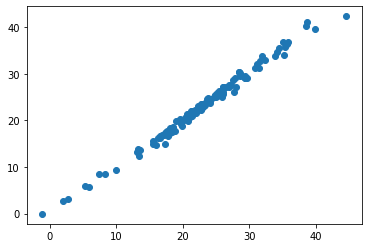

In [16]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_pred_in)

In [25]:
l = [1,2,3,4,5]
l.pop(l.index(max(l)))
print(l)

[1, 2, 3, 4]
